Benjamin Huo group 3,Alec Neme, Helena Sokolovska, Senlin Sun

section 0 feedback and score:20/30
part 1
forgot to submit ipynb file.
The dataset description does not render well.
Forgot to state the total numbers of observations and variables.
Missing two variables: Z-revenue and Z-CostContact.
It is better to include a link to data source so that it is easier for readers to follow along.

part2
Visualization: Missing legends for both plots.
Not informative and ambitious enough. Difficult to interpret the first plot due to the overlap of dots and the outlier (suggest removing it)

part3
Only two questions are answered, no answer for "What do you learn from your visualization?"
No clear "cluster of responders", the green and read points are heavily overlapped. The visualization does not support your conclusion.
The numerical values in your interpretation are inconsistent with those in the heat map, please either round to the same precision in both places or update the plot labels to match your text. 


I used * to highlight fixed area

This dataset contains information about a company's customers and how the customers react to the company's products and promotions, and includes the location of purchase. In the Customer Personality Analysis database, there are 7 quantitative continuous variables: Income (yearly household income), MntWines (money spent on wine in the last 2 years) ,MntFruits (money spent on fruits in the last 2 years) ,MntMeatProducts (money spent on meat in the last 2 years), MntFishProducts (money spent on fish in the last 2 years) ,MntSweetProducts (money spent on sweets in the last 2 years,) MntGoldProds (money spent on gold in the last 2 years)

*There are 2240 observations, and 29 total variables

There are 10 categorical variables:

ID (unique customer ID to identify and maintain privacy for the customer)

Education (educational level of the customer: Basic, Graduation, Master, PhD, 2n Cycle)

Marital_Status (marital status: Single, Married, Together, or Divorced)

Complain (binary: 1 if the customer has complained in the last 2 years, 0 otherwise)

AcceptedCmp1–5 (five binary variables: 1 if the customer accepted the offer in the nth campaign (n = 1–5), 0 otherwise)

Response (binary: 1 if the customer accepted the offer in the last campaign, 0 otherwise)

There are *11* quantitative discrete variables:

Year_Birth (year of birth)

Kidhome (number of children in the household)

Teenhome (number of teenagers in the household)

Recency (days since last purchase)

NumDealsPurchases (number of purchases made with a discount)

NumWebPurchases (number of purchases made using the website)

NumCatalogPurchases (number of purchases made using the catalog)

NumStorePurchases (number of purchases made in stores)

NumWebVisitsMonth (number of website visits in the last month) This data set is in the public domain and orginally published by Dr. Omar Romero-Hernandez and published by Akash Patel on kaggle.

*Z_CostContact: constant assigned to the cost of a customer contact

*Z-revenue constant assigned to the revenus of a customer contact

Pre-selection of variables, We can drop ID as it is only an identifier and carries no analytical value. I would also make a new variable names customer_time which subtracts Dt_Customer from the date that the data was complied, which indicate how long the customer has been shopping with the company, as this new variable is much easy to work with. All the remaining variables such as demographics (Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome), purchase history (MntWines–MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth), response to campaign (AcceptedCmp1–AcceptedCmp5, Response), and customer engagement(Recency, Complain)will be retained, as they can provide insight into customer types, purchasing patterns, and campaign effectiveness.

My question is that We want to predict whether a customer will accept the company’s marketing offer (Response) based on demographic characteristics such as Income, Education, and number of children in the household, as well as purchase history (e.g., MntWines, MntFishProducts, MntSweetProducts). This will help us evaluate the effectiveness of our marketing strategy by identifying which demographic and purchasing factors most influence customer responses.

The response variable is Response, which indicates whether a customer accepted the company’s most recent marketing campaign offer (1 = accepted, 0 = not accepted).

Our question is primarily focused on prediction, as we aim to estimate the likelihood that a customer will accept a marketing offer based on their demographics and purchase history. However, we are also slightly interested in inference, because we also want to know which factor strongly influence customer responses to our marketing.

*Link to data source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download*

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


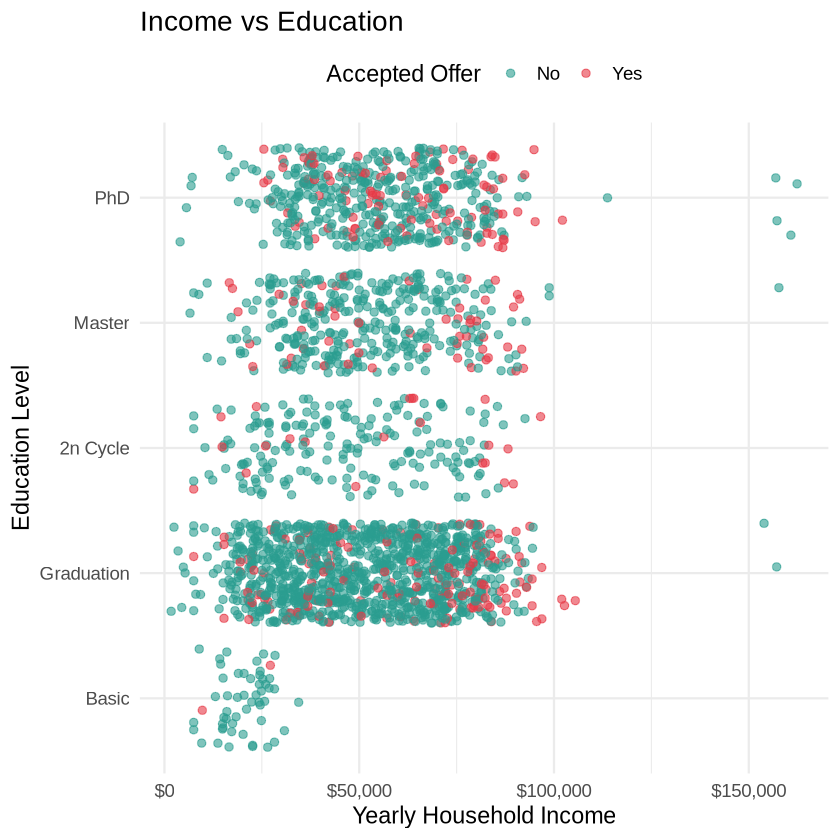

In [33]:
library(ggplot2)
library(dplyr)
library(patchwork)
library(scales)
library(data.table) 
library(tidyverse)

data <- fread("marketing_campaign.csv", 
              na.strings = c("", "NA", "NULL"),
              stringsAsFactors = FALSE)
head(data)





df_clean <- data %>%
  filter(!is.na(Income), Income < 200000) %>%
  mutate(Education = factor(Education, 
                            levels = c("Basic", "Graduation", "2n Cycle", "Master", "PhD"), 
                            ordered = TRUE),
         Response = factor(Response, labels = c("No", "Yes")))

ggplot(df_clean, aes(x = Income, y = Education, color = Response)) +
  geom_jitter(width = 0, height = 0.4, size = 2, alpha = 0.6) +
  scale_color_manual(values = c("#2A9D8F", "#E63946")) +
  scale_x_continuous(labels = scales::dollar_format()) +
  labs(title = "Income vs Education", x = "Yearly Household Income", y = "Education Level", color = "Accepted Offer") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "top")




part 2 * remove the heat map and did income vs education with response as the 3rd variable, added legends and reduce cluttering with increase opacity. *

*This plot is relevant to my question because we want to know which predictor combinations are most correlated with a customer accepting an offer in the last campaign, and education and income are major factors in deciding whether to accept an ad campaign.

For the Basic education level, their income tends to be low, and most of them do not accept the campaign. For Graduation, there are many “No” responses clustered at low income, and more “Yes” responses appear as income increases, with around $75k being the most common cluster of “Yes,” though overall, “No” responses still make up a large portion of the data points.

For 2nd Cycle, most responses are “No,” and the “Yes” points are scattered across different income levels, indicating that income does not have a strong influence for people with this education level. For Master, most responses are “No,” but there seems to be a cluster of “Yes” responses at higher incomes, showing a weak trend of income influencing response.

For PhD, most responses are “No,” and the “Yes” responses are clustered evenly but lean slightly toward higher incomes, suggesting a weak positive trend between income and acceptance for people with PhDs.

From this visualization, I learned that different educational levels are correlated with income, and each education level shows a different trend between response rate and income. At lower education levels, income is lower, and the trend is toward not responding. At higher education levels, there is a weak trend of increasing response rate with higher income. Education and income could therefore be key interaction terms.*


Section 4,
I will fit a logistic regression model to predict the probability that Response = 1, using variables such as Income, Age, Education (as dummy variables), Marital_Status (dummy), total amount spent, and the number of children/teens, along with key interaction terms (e.g., Age × Marital_Status, Income × Education). This approach is appropriate because the response is a binary variable, and logistic regression provides interpretable coefficients in terms of odds ratios, making it well-suited for modeling this dataset.

Some assumptions of the model include:

The log-odds of the outcome are linear in the predictors and interactions.

The errors are independent.

There is limited multicollinearity among the predictors.

Potential issues include:

The relationship of the log-odds with predictors might not be perfectly linear.

Complex interactions could exist that are not captured by the model.

Logistic regression is sensitive to outliers, so I filtered out extreme values, such as Income > 200k.



In [38]:
library(tidyverse)
library(data.table)
library(broom)
library(scales)


data <- fread("marketing_campaign.csv", na.strings = c("", "NA", "NULL")) %>%
  mutate(
    Age = 2025 - Year_Birth,
    Income = ifelse(Income > 200000, NA, Income),
    Total_Spent = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds,
    Education = factor(Education, levels = c("Basic", "Graduation", "2n Cycle", "Master", "PhD"), ordered = TRUE),
    Marital_Status = str_to_title(Marital_Status),
    HasPartner = ifelse(Marital_Status %in% c("Married", "Together"), "Yes", "No"),
    Response = factor(Response, labels = c("No", "Yes"))
  ) %>%
  filter(!is.na(Income))


model <- glm(Response ~ Income  + Education + Age  + 
               HasPartner + Education:Income + Age:HasPartner,
             data = data, family = binomial)

tidy(model, exponentiate = TRUE, conf.int = TRUE) %>%
  select(term, `Odds Ratio` = estimate, `95% CI low` = conf.low, 
         `95% CI high` = conf.high, p.value) 


term,Odds Ratio,95% CI low,95% CI high,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.2063704,0.05360102,0.6577409,0.01125239
Income,1.0000106,0.99995984,1.0000595,0.65998977
Education.L,1.7370239,0.12541241,61.5937277,0.71232896
Education.Q,1.4600828,0.06759835,14.9130101,0.77236204
Education.C,0.8889999,0.20829907,5.7601732,0.88445257
Education^4,0.9432008,0.28381570,2.7897583,0.91945620
Age,0.9863090,0.97239554,1.0001940,0.05510377
HasPartnerYes,0.5022872,0.15827363,1.5918788,0.24209124
Income:Education.L,1.0000261,0.99987235,1.0001859,0.72943256


The table reveals no significant associations between the outcome and Income, Education (any polynomial term), or having a partner, with only Age showing a marginally significant effect (OR = 0.986, p = 0.055). 
All Income × Education interaction terms are essentially 1 with very narrow confidence intervals, indicating no moderation effect. 
This is unexpected because demographics would typically be strong predictors or at least have some significant effect on response. It is possible that a logistic model is not optimal for this dataset, as the visualization above suggests that the relationship between some Education levels and Income is not linear, particularly for the Master’s category, and switching to a non-linear model may improve predictive power.